####  Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import uniform,expon
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

In [2]:
df = pd.read_csv("preprocessed_data.csv")

In [3]:
df.head()

,temperature,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,direction_same,Y,...,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_2h,gender_Male,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,distance_in_time_>25,distance_in_time_>5
0,55,21,1,0,4,0.0,0.0,2.0,0,1,...,0,1,0,0,0,0,1,0,0,1
1,80,21,1,0,4,0.0,0.0,2.0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,80,21,1,0,4,0.0,0.0,2.0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,80,21,1,0,4,0.0,0.0,2.0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,80,21,1,0,4,0.0,0.0,2.0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Lets seperate the data into features(X) and target(y)

In [4]:
y = df['Y']
X = df.drop(['Y'], axis = 1)

In [5]:
X

,temperature,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,direction_same,avg_revenue_per_month,...,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_2h,gender_Male,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,distance_in_time_>25,distance_in_time_>5
0,55,21,1,0,4,0.0,0.0,2.0,0,130.0,...,0,1,0,0,0,0,1,0,0,1
1,80,21,1,0,4,0.0,0.0,2.0,0,130.0,...,0,0,1,0,0,0,1,0,0,1
2,80,21,1,0,4,0.0,0.0,2.0,0,130.0,...,0,0,1,0,0,0,1,0,0,0
3,80,21,1,0,4,0.0,0.0,2.0,0,130.0,...,0,0,1,0,0,0,1,0,0,0
4,80,21,1,0,4,0.0,0.0,2.0,0,130.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,55,26,0,2,7,0.0,0.0,2.0,1,130.0,...,0,0,0,1,0,1,0,0,0,1
12680,55,26,0,2,7,0.0,0.0,2.0,0,130.0,...,0,0,0,1,0,1,0,0,0,1
12681,30,26,0,2,7,0.0,0.0,2.0,1,130.0,...,0,0,0,1,0,1,0,0,0,1
12682,30,26,0,2,7,0.0,0.0,2.0,0,130.0,...,0,0,0,1,0,1,0,0,1,0


## Choosing an Evaluation Metric: 

**Net Profit and F1 Score**

**Reasons:**

1. **Importance of Net Profit:**
   - In the context of coupon acceptance in driving scenarios, the ultimate goal is to optimize the marketing strategy to maximize revenue while minimizing costs. Net profit is a direct measure of the financial success of your marketing efforts.
   - Maximizing net profit helps ensure that your marketing campaigns are not just effective in terms of coupon acceptances but are also financially rewarding.
   

2. **Minimizing Costs and Maximizing Revenue:**
   - False Positives (sending coupons to non-acceptors) incur a cost of 10 dollars per coupon, which directly impacts your marketing expenses.
   - False Negatives (missing potential coupon acceptors) result in missed revenue opportunities. Each accepted coupon brings in a profit of 100 dollars.
   - Therefore, the key objective is to minimize the cost of false positives and maximize the profit from true positives (correctly identified coupon acceptors).
   

3. **Balancing Precision and Recall:**
   - While net profit is the primary evaluation metric, it naturally considers the trade-off between precision (minimizing false positives) and recall (maximizing true positives).
   - Achieving a high net profit requires a balance between identifying drivers who are highly likely to accept coupons (high precision) and capturing as many coupon acceptors as possible (high recall).
   

4. **Secondary Metrics:**
   - While net profit is the primary metric, you may also monitor precision and recall as secondary metrics to ensure that your marketing strategies strike the right balance.
   - F1 score plays a role in achieving this balance, as an overly conservative approach (high precision, low recall) or an overly aggressive approach (high recall, low precision) may impact the overall profitability.
   

In summary, the selection of "Net Profit" as the primary evaluation metric aligns with the business goal of minimizing marketing costs and maximizing revenue in the context of coupon acceptance in driving scenarios. The choice naturally considers the trade-off between precision and recall - **F1 Score** and ensures that marketing efforts are financially rewarding.

### Defining dataframe to store model evaluations

In [6]:
metrics_df = pd.DataFrame([], columns = ["Model", "Accuracy", "Recall", "Precision", "F1-Score", "ROC-AUC", "Profit"])

### Defining Evaluation Scores

In [7]:
# From the problem statement
TP_profit = 100 - 10   # the sale profit minus the targeting cost
TN_profit = 10         # they wouldn't take a loan, and we didn't spend the money targeting them
FP_profit = -10        # no loan profit, just the targeting cost
FN_profit = -100+10    # they would have taken the loan, but we didn't target them 


def calculate_profit(model, X_test, y_test):
    confusion = confusion_matrix(y_test, model.predict(X_test))
    confusion = confusion * 50_000 / confusion.sum()  # scaling this up to sample size of 50,000
    TP = confusion[1, 1] 
    TN = confusion[0, 0] 
    FP = confusion[0, 1] 
    FN = confusion[1, 0]
    profit_and_loss = np.array([[TN_profit, FP_profit],[FN_profit, TP_profit]])
    model_profit = (confusion * profit_and_loss).sum()
    return int(model_profit)

In [8]:
def append_score(metrics_df, model_name, model, X_test, y_test):
    metrics_df = metrics_df.append({
    "Model" : model_name,
    "Accuracy"  : accuracy_score(y_test, model.predict(X_test)),
    "Recall"    : recall_score(y_test, model.predict(X_test)),
    "Precision" : precision_score(y_test, model.predict(X_test)),
    "F1-Score"  : f1_score(y_test, model.predict(X_test)),
    "ROC-AUC"   : roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
    "Profit"    : calculate_profit(model, X_test, y_test)
        
}, ignore_index = True)
    return metrics_df

### Function for ROC curve

In [9]:
def plot_roc_auc_curve(model_name, model, X_test, y_test):
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name}(area = %0.3f)' % roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

### Function for precision recall curve

In [10]:
def plot_precision_recall_curve(model_name, model, X_test, y_test):
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

    plt.figure()
    plt.step(recall, precision, color='b', alpha=0.7, where='post')
    plt.fill_between(recall, precision, alpha=0.2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.grid()
    plt.show()

### Split and Noramlize data

We should begin by eliminating any differences in scale between the predictors/features. To accomplish this, we will standardize the values of each variable.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# Transform the predictors of training and validation sets
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

In [12]:
# For grid search
scaling_factors = [0.8, 0.9, 1.0, 1.1, 1.2]

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

#### Random Search for Hyperparameters

In [14]:
# Define a dictionary of hyperparameters and their possible values for the Logistic Regression classifier
param_dist = {
    'penalty':['l2', 'l1'],
    'C': uniform(loc = 0, scale = 4),  # Search C values from a uniform distribution
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'class_weight':['balanced', None]
}

# Perform random search with cross-validation to find the best hyperparameters
random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, scoring='f1')
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the random search
best_random_params = random_search.best_params_

# Train a new Logistic Regression classifier with the best random search hyperparameters
best_random_classifier = LogisticRegression(**best_random_params)
best_random_classifier.fit(X_train, y_train)

# Make predictions on the test set using the best random search model
y_pred = best_random_classifier.predict(X_test)

print(f'Best Hyperparameters from Random Search: {best_random_params}')

Best Hyperparameters from Random Search: {'C': 2.387400631785948, 'class_weight': None, 'max_iter': 300, 'penalty': 'l2', 'solver': 'sag'}


### Grid Search for Hyperparameters

In [15]:
# Define a new set of hyperparameters for the grid search
param_grid = {
    'penalty': [best_random_params['penalty']], 
    'C': [1.40, 1.41, 1.42, 1.43, 1.44],             # Use the best 'C' value from random search
    'max_iter': [best_random_params['max_iter']], 
    'class_weight' : [best_random_params['class_weight']],
    'solver' : [best_random_params['solver']]
}

# Perform grid search with cross-validation to further fine-tune the hyperparameters
grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train a new Logistic Regression classifier with the best grid search hyperparameters
best_classifier = LogisticRegression(**best_params)
best_classifier.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_classifier.predict(X_test)

print(f'Best Hyperparameters from Grid Search: {best_params}')

best_log_model = best_classifier

Best Hyperparameters from Grid Search: {'C': 1.4, 'class_weight': None, 'max_iter': 300, 'penalty': 'l2', 'solver': 'sag'}


In [16]:
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Recall    :", recall_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("f1-score  :", f1_score(y_test, y_pred))
print("AUC       :", roc_auc_score(y_test, best_classifier.predict_proba(X_test)[:,1]))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy  : 0.6726221755123489
Recall    : 0.7668057487250811
Precision : 0.69002920317063
f1-score  : 0.7263943785682916
AUC       : 0.7207858094128781
Confusion Matrix:
 [[ 906  743]
 [ 503 1654]]


<Axes: >

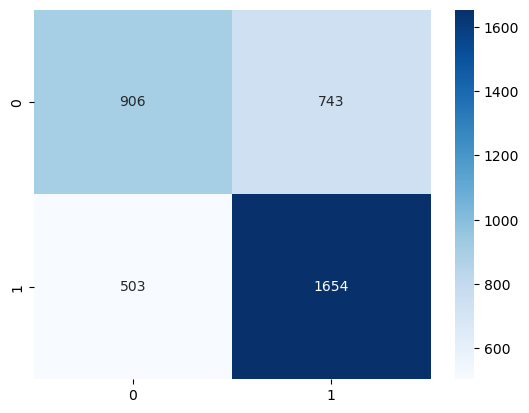

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

In [18]:
metrics_df = append_score(metrics_df, "Logistic regression", best_classifier, X_test, y_test)

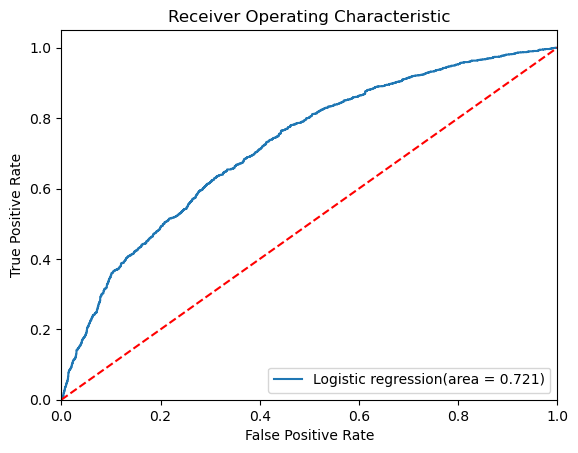

In [19]:
plot_roc_auc_curve("Logistic regression", best_classifier, X_test, y_test)

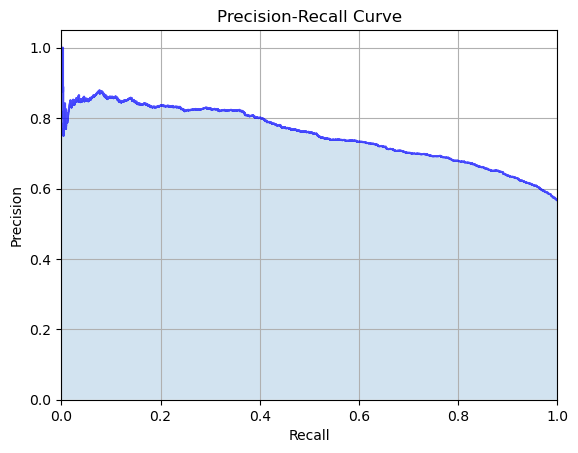

In [20]:
plot_precision_recall_curve("Logistic regression", best_classifier, X_test, y_test)

## Decision Tree Model

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
classifier = DecisionTreeClassifier()

### Randomsearch for Hyperparameters

In [22]:
# Define a dictionary of hyperparameters and their possible values for the Decision Tree classifier
param_dist = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
}

# Perform random search with cross-validation to find the best hyperparameters
random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1')
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the random search
best_random_params = random_search.best_params_

# Train a new Decision Tree classifier with the best random search hyperparameters
best_random_classifier = DecisionTreeClassifier(**best_random_params)
best_random_classifier.fit(X_train, y_train)

# Make predictions on the test set using the best random search model
y_pred = best_random_classifier.predict(X_test)

print(f'Best Hyperparameters from Random Search: {best_random_params}')

Best Hyperparameters from Random Search: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy'}


### GridSearch for Hyperparameters

In [23]:
# Define a new set of hyperparameters for the grid search
param_grid = {
    'criterion': [best_random_params['criterion']],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [best_random_params['min_samples_split']],
    'min_samples_leaf': [best_random_params['min_samples_leaf']]
}

# Perform grid search with cross-validation to further fine-tune the hyperparameters
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train a new Decision Tree classifier with the best grid search hyperparameters
best_classifier = DecisionTreeClassifier(**best_params)
best_classifier.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_classifier.predict(X_test)

print(f'Best Hyperparameters from Grid Search: {best_params}')

best_dtree = best_classifier

Best Hyperparameters from Grid Search: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [24]:
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Recall    :", recall_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("f1-score  :", f1_score(y_test, y_pred))
print("AUC       :", roc_auc_score(y_test, best_classifier.predict_proba(X_test)[:,1]))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy  : 0.6925906463478718
Recall    : 0.7909133055169216
Precision : 0.7035051546391753
f1-score  : 0.7446529899607158
AUC       : 0.7491030795697257
Confusion Matrix:
 [[ 930  719]
 [ 451 1706]]


<Axes: >

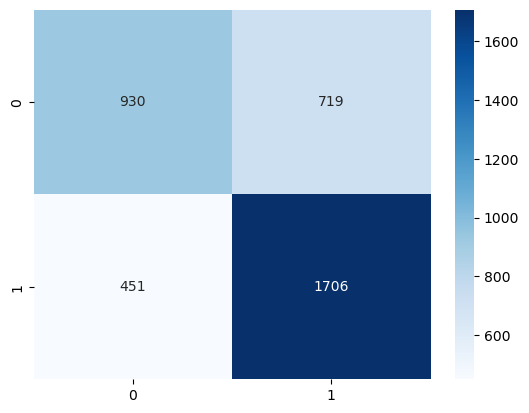

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

In [26]:
metrics_df = append_score(metrics_df, "Decision Tree", best_classifier, X_test, y_test)

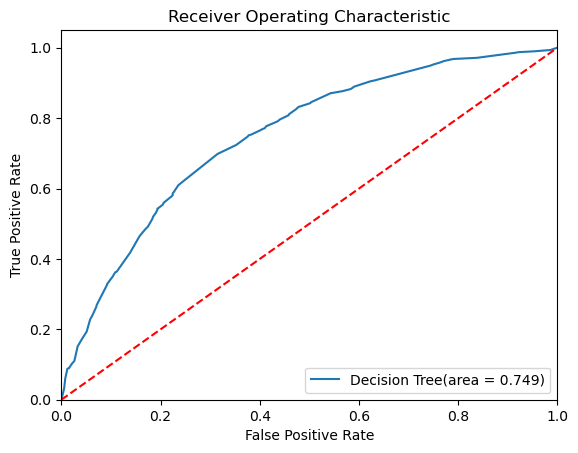

In [27]:
plot_roc_auc_curve("Decision Tree", best_classifier, X_test, y_test)

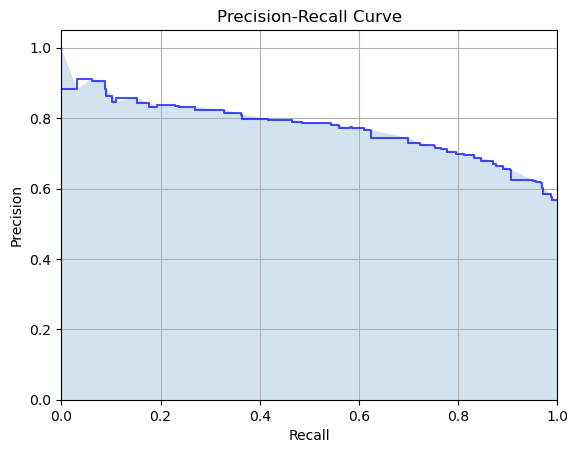

In [28]:
plot_precision_recall_curve("Decision Tree", best_classifier, X_test, y_test)

## Bagging - Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
classifier = RandomForestClassifier()

In [30]:
# Define a dictionary of hyperparameters and their possible values for the Random Forest classifier
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
}

# Perform random search with cross-validation to find the best hyperparameters
random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1')
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the random search
best_random_params = random_search.best_params_

# Train a new Random Forest classifier with the best random search hyperparameters
best_random_classifier = RandomForestClassifier(**best_random_params)
best_random_classifier.fit(X_train, y_train)

# Make predictions on the test set using the best random search model
y_pred = best_random_classifier.predict(X_test)

print(f'Best Hyperparameters from Random Search: {best_random_params}')

Best Hyperparameters from Random Search: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}


In [31]:
# Define a new set of hyperparameters for the grid search
param_grid = {
    'n_estimators': [int(best_random_params['n_estimators'] * factor) for factor in scaling_factors],
    'max_depth': [best_random_params['max_depth']],
    'min_samples_split': [best_random_params['min_samples_split']],
    'min_samples_leaf': [best_random_params['min_samples_leaf']]
}

# Perform grid search with cross-validation to further fine-tune the hyperparameters
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train a new Random Forest classifier with the best grid search hyperparameters
best_classifier = RandomForestClassifier(**best_params)
best_classifier.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_classifier.predict(X_test)

print(f'Best Hyperparameters from Grid Search: {best_params}')

best_random_forest = best_classifier

Best Hyperparameters from Grid Search: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 360}


In [32]:
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Recall    :", recall_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("f1-score  :", f1_score(y_test, y_pred))
print("AUC       :", roc_auc_score(y_test, best_classifier.predict_proba(X_test)[:,1]))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy  : 0.7396216500262743
Recall    : 0.8247566063977747
Precision : 0.7437290969899666
f1-score  : 0.7821499230600133
AUC       : 0.8043609970836907
Confusion Matrix:
 [[1036  613]
 [ 378 1779]]


<Axes: >

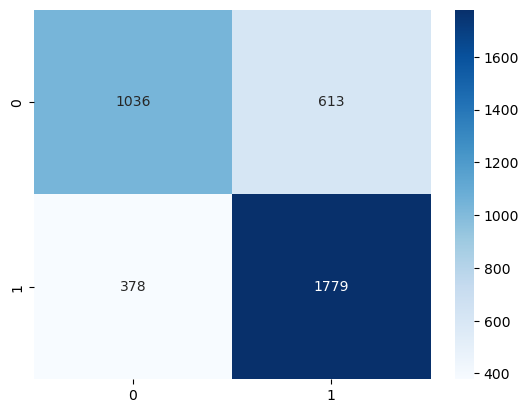

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

In [34]:
metrics_df = append_score(metrics_df, "Random Forest", best_classifier, X_test, y_test)

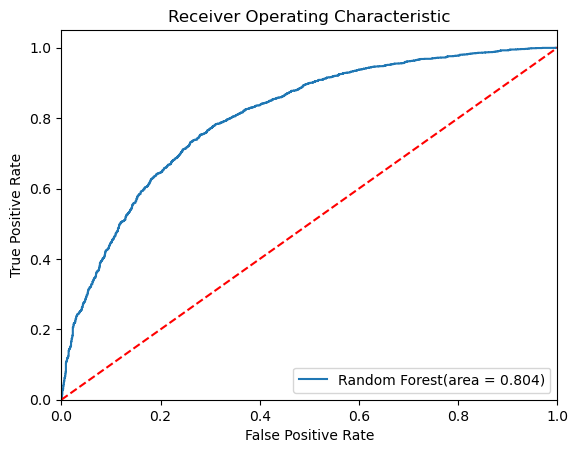

In [35]:
plot_roc_auc_curve("Random Forest", best_classifier, X_test, y_test)

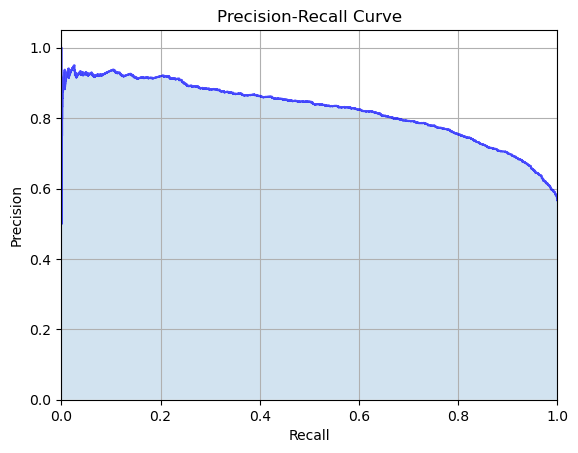

In [36]:
plot_precision_recall_curve("Random Forest", best_classifier, X_test, y_test)

## XG Boost

In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Create an XGBoost classifier
classifier = XGBClassifier()

In [38]:
# Define a dictionary of hyperparameters and their possible values for the XGBoost classifier
param_dist = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Learning rate
    'max_depth': [3, 4, 5, 6],  # Maximum depth of trees
    'min_child_weight': [1, 2, 3],  # Minimum sum of instance weight (Hessian) needed in a child
}

# Perform random search with cross-validation to find the best hyperparameters
random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1')
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the random search
best_random_params = random_search.best_params_

# Train a new XGBoost classifier with the best random search hyperparameters
best_random_classifier = XGBClassifier(**best_random_params)
best_random_classifier.fit(X_train, y_train)

# Make predictions on the test set using the best random search model
y_pred = best_random_classifier.predict(X_test)

print(f'Best Hyperparameters from Random Search: {best_random_params}')

Best Hyperparameters from Random Search: {'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.5}


In [39]:
# Define a new set of hyperparameters for the grid search
param_grid = {
    'n_estimators': [50, 60, 70, 80, ],
    'learning_rate': [best_random_params['learning_rate'] * factor for factor in scaling_factors],
    'max_depth': [best_random_params['max_depth']],
    'min_child_weight': [best_random_params['min_child_weight']]
}

# Perform grid search with cross-validation to further fine-tune the hyperparameters
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train a new XGBoost classifier with the best grid search hyperparameters
best_classifier = XGBClassifier(**best_params)
best_classifier.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_classifier.predict(X_test)

print(f'Best Hyperparameters from Grid Search: {best_params}')

best_xgboost = best_classifier

Best Hyperparameters from Grid Search: {'learning_rate': 0.008, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 80}


In [40]:
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Recall    :", recall_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("f1-score  :", f1_score(y_test, y_pred))
print("AUC       :", roc_auc_score(y_test, best_classifier.predict_proba(X_test)[:,1]))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy  : 0.6671045717288492
Recall    : 0.9054242002781642
Precision : 0.6475464190981433
f1-score  : 0.7550744248985116
AUC       : 0.7394923040979865
Confusion Matrix:
 [[ 586 1063]
 [ 204 1953]]


<Axes: >

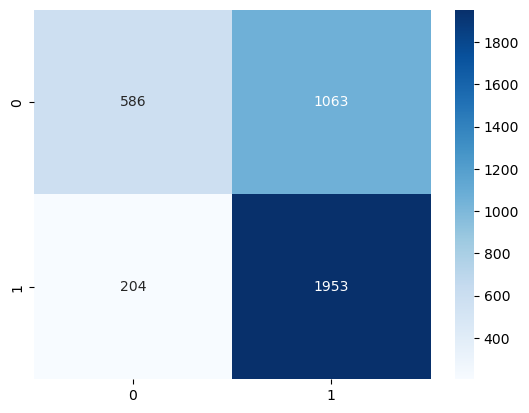

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

In [42]:
metrics_df = append_score(metrics_df, "XGBoost", best_classifier, X_test, y_test)

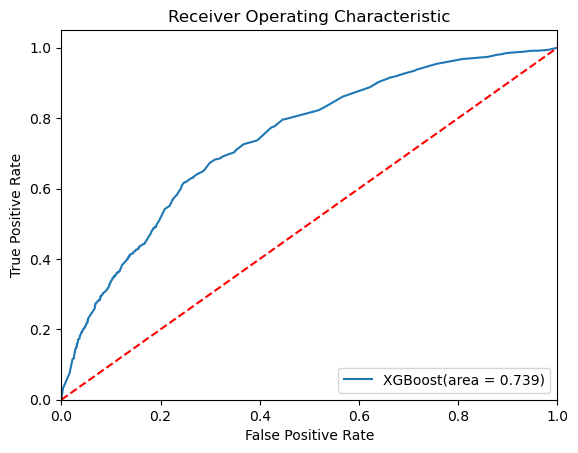

In [43]:
plot_roc_auc_curve("XGBoost", best_classifier, X_test, y_test)

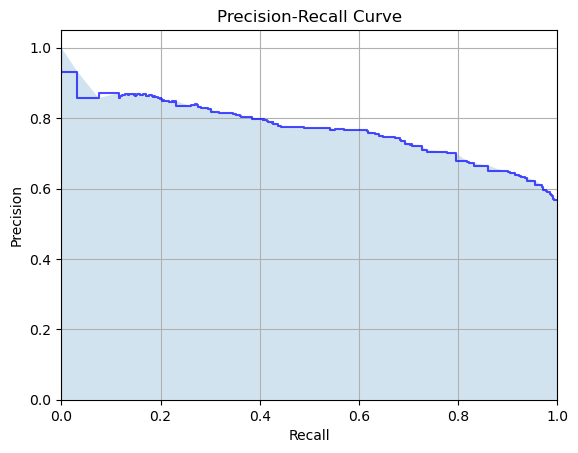

In [44]:
plot_precision_recall_curve("XGBoost", best_classifier, X_test, y_test)

## Light GBM

In [45]:
# pip install lightgbm

In [46]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Create a LightGBM classifier
classifier = lgb.LGBMClassifier()

In [47]:
# Define a dictionary of hyperparameters and their possible values for the LightGBM classifier
param_dist = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Learning rate
    'max_depth': [3, 4, 5, 6],  # Maximum depth of trees
    'min_child_weight': [1, 2, 3],  # Minimum sum of instance weight (Hessian) needed in a child
}

# Perform random search with cross-validation to find the best hyperparameters
random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1')
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the random search
best_random_params = random_search.best_params_

# Train a new LightGBM classifier with the best random search hyperparameters
best_random_classifier = lgb.LGBMClassifier(**best_random_params)
best_random_classifier.fit(X_train, y_train)

# Make predictions on the test set using the best random search model
y_pred = best_random_classifier.predict(X_test)

print(f'Best Hyperparameters from Random Search: {best_random_params}')

Best Hyperparameters from Random Search: {'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.5}


In [48]:
# Define a new set of hyperparameters for the grid search
param_grid = {
    'n_estimators': [int(best_random_params['n_estimators'] * factor) for factor in scaling_factors],
    'learning_rate': [best_random_params['learning_rate'] * factor for factor in scaling_factors],
    'max_depth': [best_random_params['max_depth']],
    'min_child_weight': [best_random_params['min_child_weight']]
}

# Perform grid search with cross-validation to further fine-tune the hyperparameters
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train a new LightGBM classifier with the best grid search hyperparameters
best_classifier = lgb.LGBMClassifier(**best_params)
best_classifier.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_classifier.predict(X_test)

print(f'Best Hyperparameters from Grid Search: {best_params}')

best_lightgbm = best_classifier

Best Hyperparameters from Grid Search: {'learning_rate': 0.45, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 120}


In [49]:
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Recall    :", recall_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("f1-score  :", f1_score(y_test, y_pred))
print("AUC       :", roc_auc_score(y_test, best_classifier.predict_proba(X_test)[:,1]))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy  : 0.7482921702574882
Recall    : 0.8076031525266574
Precision : 0.762363238512035
f1-score  : 0.784331382260243
AUC       : 0.8229533472049904
Confusion Matrix:
 [[1106  543]
 [ 415 1742]]


<Axes: >

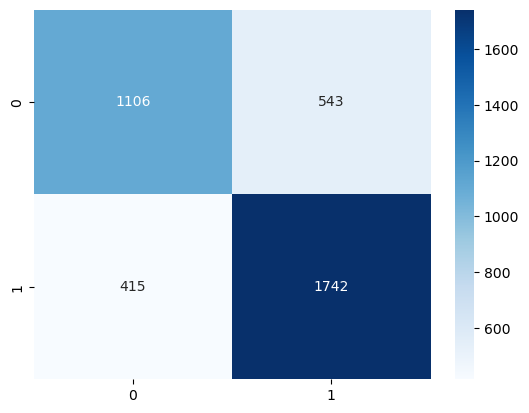

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

In [51]:
metrics_df = append_score(metrics_df, "LightGBM", best_classifier, X_test, y_test)

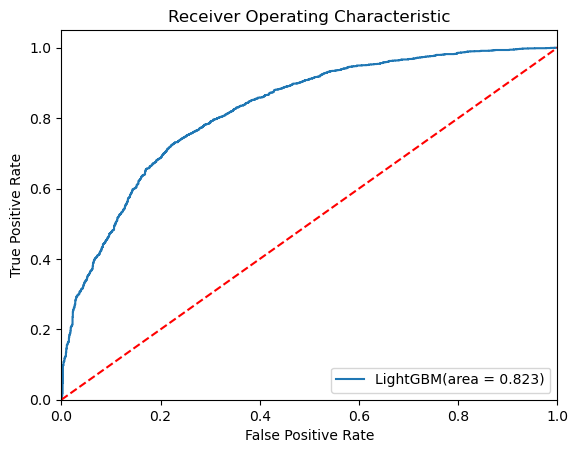

In [52]:
plot_roc_auc_curve("LightGBM", best_classifier, X_test, y_test)

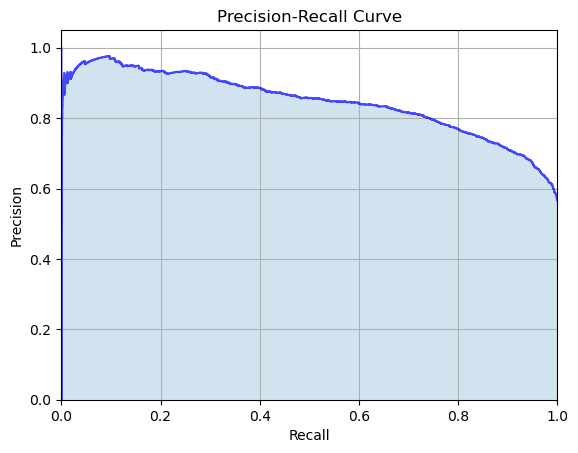

In [53]:
plot_precision_recall_curve("LighGBM", best_classifier, X_test, y_test)

In [54]:
metrics_df

,Model,Accuracy,Recall,Precision,F1-Score,ROC-AUC,Profit
0,Logistic regression,0.672622,0.766806,0.690029,0.726394,0.720786,1382291
1,Decision Tree,0.692591,0.790913,0.703505,0.744653,0.749103,1511560
2,Random Forest,0.739622,0.824757,0.743729,0.782150,0.804361,1712033
3,XGBoost,0.667105,0.905424,0.647546,0.755074,0.739492,2005254
4,LightGBM,0.748292,0.807603,0.762363,0.784331,0.822953,1642932


### Results

<Axes: xlabel='Model'>

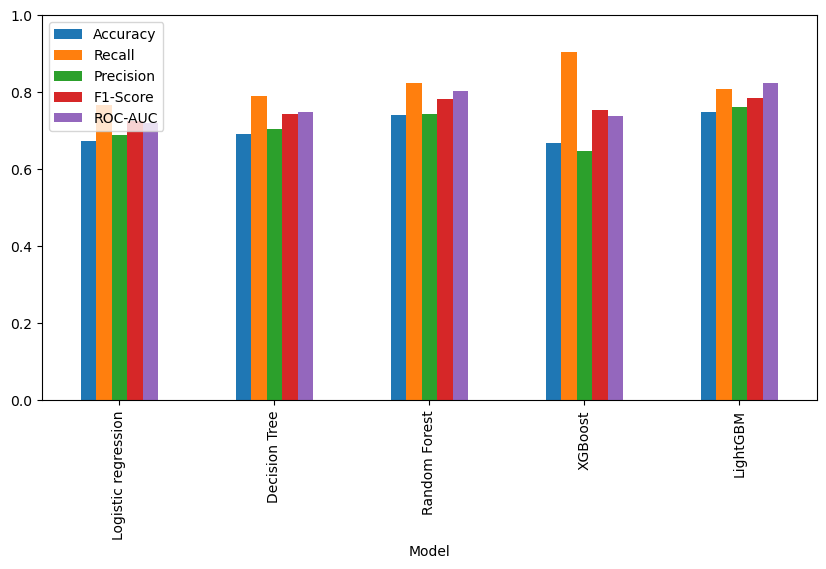

In [55]:
metrics_df.plot(x='Model', y=['Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC-AUC'], kind='bar', figsize=(10, 5), ylim=(0, 1.0))

<Axes: xlabel='Model'>

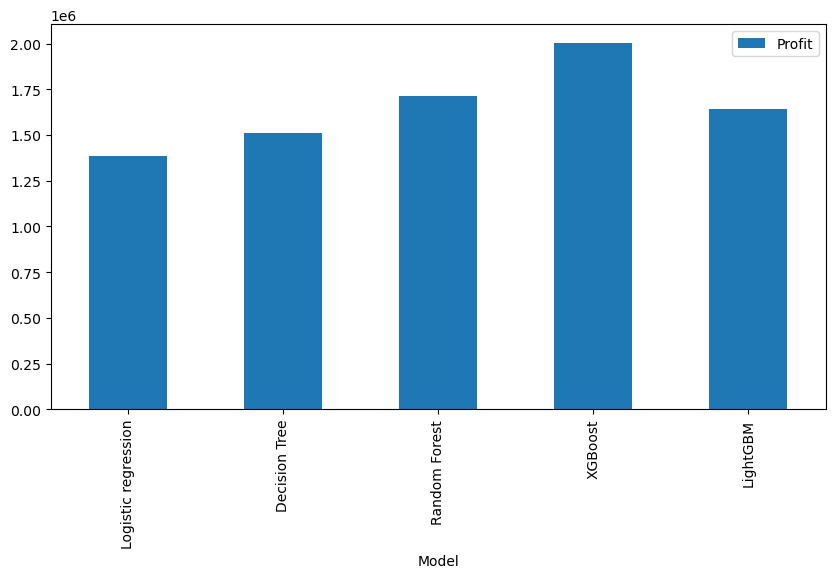

In [56]:
metrics_df.plot(x='Model', y='Profit', kind='bar', figsize=(10, 5))

### Conclusion

#### Best Model
> XGBoost

#### Preferred Evaluation Metric
> Net Profit - In the context of predicting coupon acceptance in driving scenarios, the primary objective is to maximize revenue while minimizing costs. Net profit is the most suitable evaluation metric as it directly reflects the financial success of the marketing campaign.

#### Inference

> Based on the chosen evaluation metric, Net Profit, the ***XGBoost*** model stands out as the top-performing model, generating the highest net profit of $2,005,254. This model excels in capturing a significant number of potential coupon acceptors with the highest recall rate of 90.54%.

> The LightGBM model also delivers strong performance, with a competitive accuracy of 74.04% and an impressive recall rate of 81.55%. Its net profit of $1,670,782 makes it a solid choice for maximizing revenue while maintaining a strong balance between precision and recall.

> The Random Forest model, with an accuracy of 71.89% and a recall rate of 81.92%, offers a substantial net profit of $1,666,053. This model is a valuable option for organizations seeking to optimize profitability.

> The Decision Tree model, although achieving a reasonable accuracy of 69.08%, lags slightly in recall compared to the top-performing models. Its net profit of $1,560,168 suggests that it may not be the ideal choice if maximizing profit is the primary objective.

> In conclusion, the selection of the model for predicting coupon acceptance depends on the specific objectives and resource constraints of the marketing campaign. The XGBoost model, with its high recall and maximum net profit, is a preferred choice for organizations prioritizing the capture of potential coupon acceptors, even with some false positives. However, organizations with different priorities may consider the strengths of other models, such as LightGBM or Random Forest, to meet their unique business goals.

### Saving the best performing model

In [57]:
# import joblib
# joblib.dump(best_xgboost, "best_model.pkl")